# Data Analysis Programming --- Assignment 2
## NYC Restaurants
                                         Tiffany Sung (from Group 3)

### Setup

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)

Populating the interactive namespace from numpy and matplotlib


### (Q1)

In [2]:
df['RESTAURANT'] = df['DBA']+' '+df['BUILDING']+' '+df['STREET']+' '+df['ZIPCODE']

df['RESTAURANT'].iloc[0:10] #use iloc to locate first 10 rows

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

### (Q2)

In [3]:
unique_restaurant = df.drop_duplicates(subset='RESTAURANT')
len(unique_restaurant)

10114

### (Q3)
* Step 1: select the column 'DBA' and 'RESTAURANT'
* Step 2: drop the duplicates in 'RESTAURANT' then you'll have unique address data
* Step 3: make a mask that if values in 'DBA' still >1, meaning there's a chain
* Step 4: use the mask to find those 'DBA' which have chains
* Step 5: return length of chains which is the number of chains

In [4]:
dba_restaurant = df[['DBA','RESTAURANT']]
dba_restaurant_dedup = dba_restaurant.drop_duplicates(subset='RESTAURANT')
chain_mask = dba_restaurant_dedup['DBA'].value_counts() > 1 
have_chains = dba_restaurant_dedup['DBA'].value_counts()[chain_mask]
len(have_chains)

368

### (Q4)

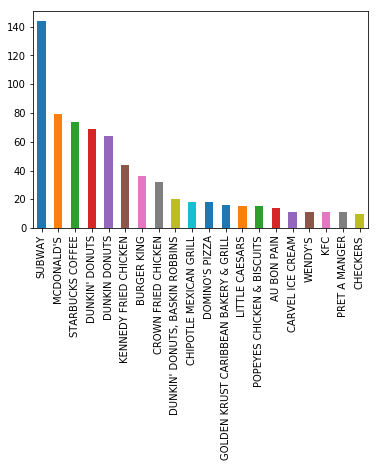

In [5]:
have_chains[:20].plot(kind='bar')

### (Q5)
* Step 1: count the number of unique restaurants
* Step 2: count the number of unique restaurants that are chains
* Step 3: divided step2 by step3

In [6]:
num_restaurant = len(unique_restaurant)
chains_sum = have_chains.sum()
print float(chains_sum)/(num_restaurant)

0.164722167293


### (Q6)

* Step 1: set the 'Missing' in 'BORO' column to be NaN, that way it won't be counted
* Step 2: creat dataframe with 'DBA','BORO'and 'RESTAURANT'; drop the duplicates of 'RESTAURANT' return unique restaurants; and set 'DBA' as index
* Step 3: find the non-chains restaurants which chain_mask in (Q5), counts the numbers and plot

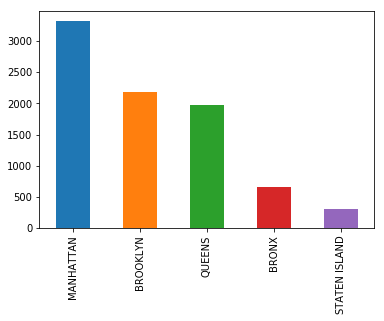

In [7]:
#clean the data in column "BORO" where values are 'Missing'
boro_mask = (df['BORO'] == 'Missing')
df.loc[boro_mask, 'BORO'] = np.nan 

#create a new dataframe and put 'DBA', 'BORO' and 'RESTAURANT' into it.
dba_boro_restaurant = df[['DBA','BORO','RESTAURANT']].drop_duplicates(subset='RESTAURANT').set_index('DBA')

non_chains = dba_boro_restaurant['BORO'][~chain_mask].value_counts()
non_chains.plot(kind='bar')

### (Q7)
* Step 1: count the total restaurants in each borough
* Step 2: calculate the fraction by dividing non_chains by total restaurants in each borough

According to (Q6) and (Q7), the highest ratio of independent restaurant is in Brooklyn, but the borough that has the most independent retaurant is in Mahattan.

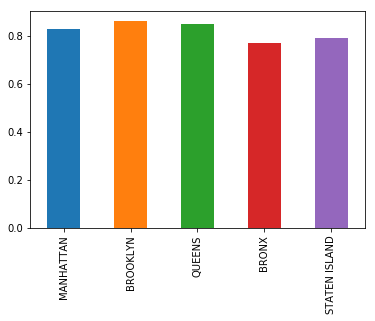

In [8]:
total_restaurants_boro = dba_boro_restaurant['BORO'].value_counts() 
boro_fraction = non_chains / total_restaurants_boro
boro_fraction.plot(kind='bar')

### (Q8)

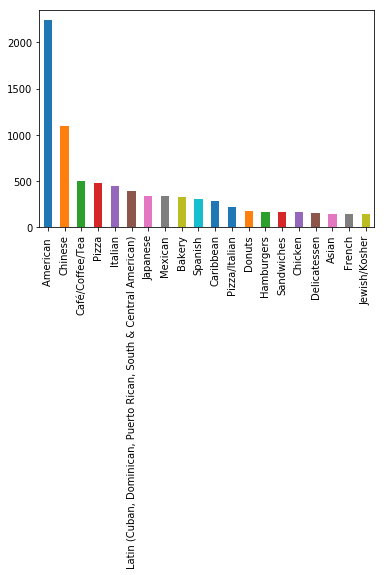

In [9]:
cuisine = df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates(subset='RESTAURANT')
cuisine['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind = 'bar')

### (Q9)
* Step 1: set a mask where the 'VIOLATION CODE' is null ; a mask where the 'VIOLATION CODE' is not null
* Step 2: apply the mask to violation_restaurant_df dataframe and drop duplicates of 'RESTAURANT'
* Step 3: set a mask that is the null_restaurants minus its intersection with not_restaurants
* Step 4: apply mask in step 3 to the null_restaurants and we get the truly no violation brands of restaurants

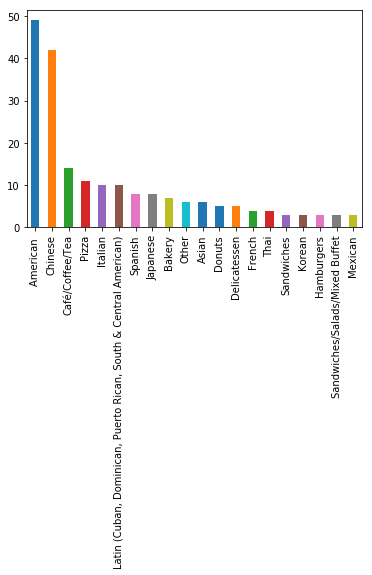

In [10]:
violation_restaurant_df = df[['RESTAURANT', 'VIOLATION CODE', 'CUISINE DESCRIPTION']]

violations_null_mask = violation_restaurant_df['VIOLATION CODE'].isnull()
violations_not_mask = violation_restaurant_df['VIOLATION CODE'].notnull()

null_restaurants = violation_restaurant_df[violations_null_mask].drop_duplicates(subset='RESTAURANT')
not_restaurants = violation_restaurant_df[violations_not_mask].drop_duplicates(subset='RESTAURANT')

clean_mask = ~null_restaurants['RESTAURANT'].isin(not_restaurants['RESTAURANT'])

clean_restaurants = null_restaurants[clean_mask]
clean_restaurants['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind='bar')

### (Q10)

Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64


/Users/tiffblahthegiraffe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


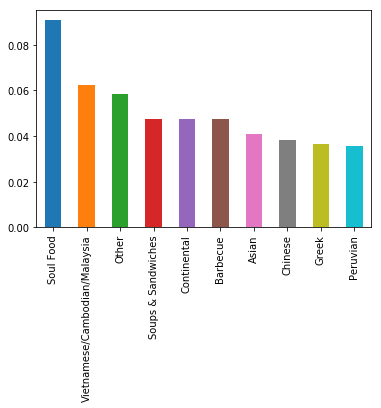

In [11]:
cuisine_20 = cuisine['CUISINE DESCRIPTION'].value_counts() >= 20
clean_restaurants.index = clean_restaurants['CUISINE DESCRIPTION']

no_violation_cuisine = clean_restaurants[cuisine_20]['CUISINE DESCRIPTION'].value_counts()
total_cuisine_restaurant = cuisine['CUISINE DESCRIPTION'].value_counts()[cuisine_20]

ratio = no_violation_cuisine*1.0 / total_cuisine_restaurant

print ratio.sort_values(ascending=False)[:10]
ratio.sort_values(ascending=False)[:10].plot(kind = 'bar')

### (Q11)
* Step 1: create a dataframe of boroughs and violations, dropping any missing values for boroughs
* Step 2: create a crosstab of the two columns
* Step 3: transpose such that 'BORO' is the row, and return the most common violation

In [12]:
boro_violation = df[['BORO', 'VIOLATION DESCRIPTION']].dropna(axis = 0)
boro_violation_num = pd.crosstab(boro_violation['BORO'], boro_violation['VIOLATION DESCRIPTION'])
boro_violation_num.T.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

### (Q12)

Like the previous question, but divide the boro_violation_num with the total frenquency of each violations of each borough.

In [13]:
violationFrequency = boro_violation['VIOLATION DESCRIPTION'].value_counts()
normalize = boro_violation_num / violationFrequency
normalize.T.idxmax()

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

### (Q13)

In [14]:
zip_phone = df[['PHONE','ZIPCODE']]

def substract_code(s):
    return str(s)[:3]



zip_phone['AREA CODE'] = zip_phone['PHONE'].map(substract_code)

zip_phone = zip_phone[['ZIPCODE','AREA CODE']].drop_duplicates()
zip_phone_num = pd.crosstab(zip_phone['ZIPCODE'], zip_phone['AREA CODE'],margins = True).T

area_code_mask = zip_phone_num['All'] == 1
#zip_phone_num[area_code_mask].index
len(zip_phone_num[area_code_mask].index)

/Users/tiffblahthegiraffe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


34

### (Q14)

In [15]:
def street_type(s):
    types = s.split()
    return types[-1]

In [16]:
def street_base(s):
    types = s.split()
    s = s.replace(types[-1],'')
    return s

In [17]:
df['STREET TYPE'] = df['STREET'].apply(street_type)
df['STREET BASE'] = df['STREET'].apply(street_base).dropna()
df['STREET BASE & ZIP'] = df['STREET BASE'] + ' ' + df['ZIPCODE']

unique_street = df[['STREET BASE','STREET TYPE','STREET BASE & ZIP']].drop_duplicates()

street_zip = pd.merge(unique_street, unique_street, on='STREET BASE & ZIP')

street_mask = street_zip['STREET TYPE_x'] != street_zip['STREET TYPE_y']
street_types = pd.crosstab(street_zip[street_mask]['STREET TYPE_x'], street_zip[street_mask]['STREET TYPE_y'])
street_types[['AVE', 'ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']].idxmax()

STREET TYPE_y
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object